# Algorytm realizujący potęgowanie liczby 3 do potęgi x w mod 15

In [2]:
# from qiskit import QuantumCircuit
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import transpile
from numpy import pi

In [3]:
from qiskit import Aer
from qiskit import assemble

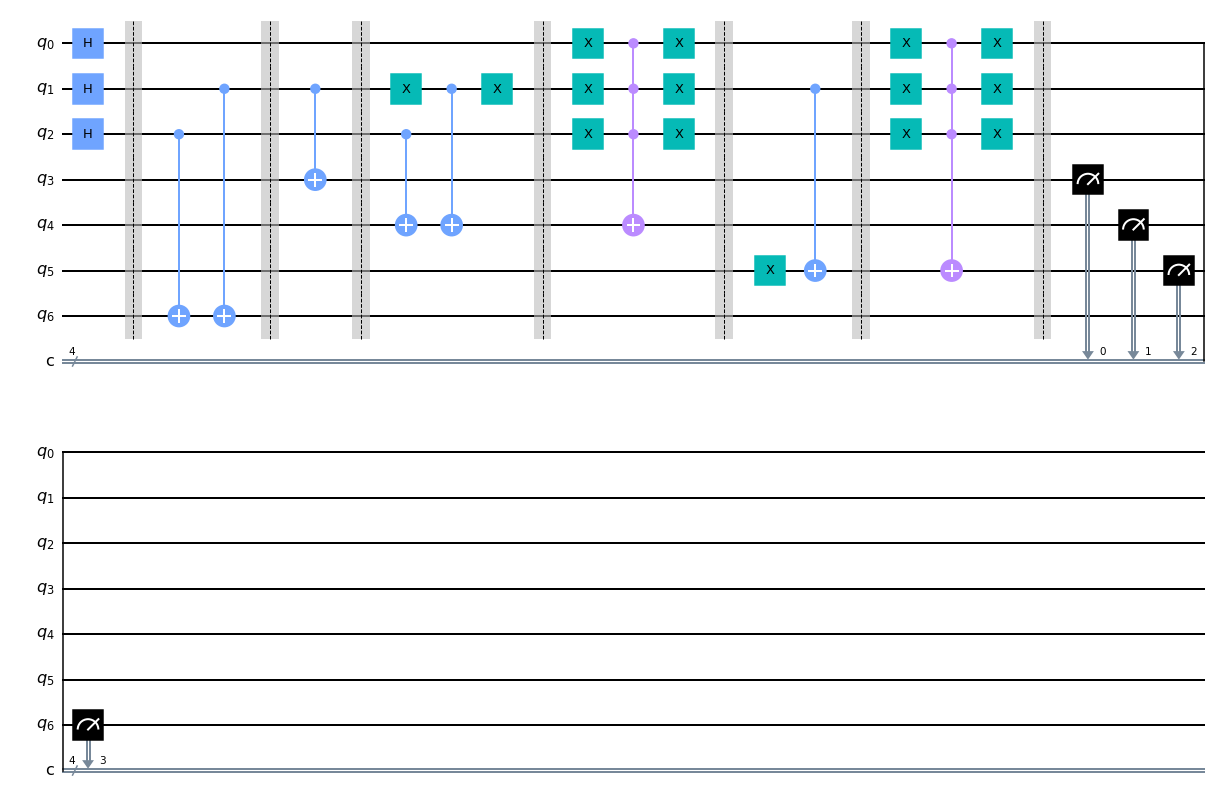

In [6]:
from qiskit.circuit.library import MCXGate
gate = MCXGate(3)

q = QuantumCircuit(7,4)

# Setup
# q.x(0)
# q.x(1)
# q.x(2)

q.h(0)
q.h(1)
q.h(2)

q.barrier()
q.cx(2,6)
q.cx(1,6)
# q.cx(0,6)
# q.ccx(0,1,6)

q.barrier()
q.cx(1,3)

q.barrier()
q.cx(2,4)
q.x(1)
q.cx(1,4)
q.x(1)

q.barrier()
q.x(0)
q.x(1)
q.x(2)
q.append(gate, [0,1,2,4])
q.x(0)
q.x(1)
q.x(2)

q.barrier()
q.x(5)
q.cx(1,5)

q.barrier()
q.x(0)
q.x(1)
q.x(2)
q.append(gate, [0,1,2,5])
q.x(0)
q.x(1)
q.x(2)


q.barrier()

# q.measure_all()
q.measure(3,0)
q.measure(4,1)
q.measure(5,2)
q.measure(6,3)

q.draw(output='mpl')


{'1001': 236, '1100': 233, '0000': 122, '0110': 142, '0011': 267}


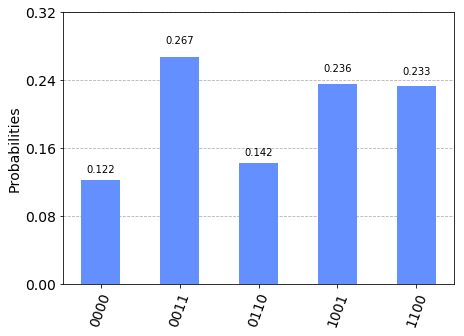

In [7]:
sym = Aer.get_backend('qasm_simulator')
tc_ = transpile(q, sym)
qobj = assemble(tc_, shots=1000)
wyniki = sym.run(qobj)

hist = wyniki.result().get_counts()
print(hist)

from qiskit.visualization import plot_histogram

plot_histogram(hist)